In [161]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Same features

We will train a CatBoost model on the Titanic dataset.

In [167]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [168]:
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 
                      'deck', 'embark_town', 'alive',"alone"], inplace=True)

In [169]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6580557	test: 0.6605953	best: 0.6605953 (0)	total: 12.3ms	remaining: 12.3s
100:	learn: 0.3623712	test: 0.4389407	best: 0.4342884 (54)	total: 169ms	remaining: 1.5s
200:	learn: 0.3290721	test: 0.4464352	best: 0.4342884 (54)	total: 324ms	remaining: 1.29s
300:	learn: 0.2948500	test: 0.4622076	best: 0.4342884 (54)	total: 476ms	remaining: 1.1s
400:	learn: 0.2705016	test: 0.4815637	best: 0.4342884 (54)	total: 639ms	remaining: 954ms
500:	learn: 0.2543097	test: 0.4819783	best: 0.4342884 (54)	total: 810ms	remaining: 807ms
600:	learn: 0.2365760	test: 0.5020827	best: 0.4342884 (54)	total: 1s	remaining: 665ms
700:	learn: 0.2223127	test: 0.5150031	best: 0.4342884 (54)	total: 1.2s	remaining: 513ms
800:	learn: 0.2089500	test: 0.5183471	best: 0.4342884 (54)	total: 1.44s	remaining: 358ms
900:	learn: 0.1998820	test: 0.5337496	best: 0.4342884 (54)	total: 1.6s	remaining: 176ms
999:	learn: 0.1909176	test: 0.5398363	best: 0.4342884 (54)	total: 1.78s	remaining: 0us

bestTest = 0.4342883903
bestIte

In [171]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       105
           1       0.86      0.68      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



# Other features

Try adding other categorical features. Does your accuracy improve?

In [142]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.drop(columns=['who', "parch", "alive","alone", "deck", "embarked"], inplace=True)

In [143]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class",  "embark_town",]
X[cat_features] = X[cat_features].astype(str).replace("nan","Boop")
X[cat_features] = X[cat_features].fillna("Boop")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,
                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6581604	test: 0.6597125	best: 0.6597125 (0)	total: 5.03ms	remaining: 5.03s
100:	learn: 0.3482876	test: 0.4233265	best: 0.4232186 (98)	total: 168ms	remaining: 1.5s
200:	learn: 0.2916384	test: 0.4222672	best: 0.4200074 (186)	total: 342ms	remaining: 1.36s
300:	learn: 0.2437262	test: 0.4207457	best: 0.4187154 (244)	total: 523ms	remaining: 1.22s
400:	learn: 0.2106366	test: 0.4267774	best: 0.4187154 (244)	total: 709ms	remaining: 1.06s
500:	learn: 0.1800107	test: 0.4290173	best: 0.4187154 (244)	total: 889ms	remaining: 886ms
600:	learn: 0.1589776	test: 0.4323846	best: 0.4187154 (244)	total: 1.07s	remaining: 713ms
700:	learn: 0.1419817	test: 0.4382693	best: 0.4187154 (244)	total: 1.28s	remaining: 548ms
800:	learn: 0.1287051	test: 0.4407800	best: 0.4187154 (244)	total: 1.5s	remaining: 373ms
900:	learn: 0.1167439	test: 0.4464775	best: 0.4187154 (244)	total: 1.7s	remaining: 186ms
999:	learn: 0.1053093	test: 0.4542332	best: 0.4187154 (244)	total: 1.9s	remaining: 0us

bestTest = 0.418715

In [145]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Regression

### Now, you will try doing regression instead of classification. 
Using the California housing dataset, train regression models using Decision Trees, Random Forest, and CatBoost. Then, plot them using sns.regplot. If the points are annoying, set scatter = False. 

In [173]:
# Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6, verbose=100,)

# Fit the model to the training data
model.fit(X_train, y_train, plot=True,eval_set = (X_test, y_test),)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1235632	test: 1.1134239	best: 1.1134239 (0)	total: 5.95ms	remaining: 11.9s
100:	learn: 0.5352689	test: 0.5566810	best: 0.5566810 (100)	total: 283ms	remaining: 5.32s
200:	learn: 0.4863204	test: 0.5159825	best: 0.5159825 (200)	total: 697ms	remaining: 6.23s
300:	learn: 0.4547078	test: 0.4926549	best: 0.4926549 (300)	total: 1.01s	remaining: 5.69s
400:	learn: 0.4314479	test: 0.4780123	best: 0.4780123 (400)	total: 1.36s	remaining: 5.43s
500:	learn: 0.4147677	test: 0.4695290	best: 0.4695290 (500)	total: 1.63s	remaining: 4.87s
600:	learn: 0.4011819	test: 0.4634567	best: 0.4634567 (600)	total: 2.02s	remaining: 4.7s
700:	learn: 0.3895065	test: 0.4591202	best: 0.4591202 (700)	total: 2.34s	remaining: 4.33s
800:	learn: 0.3791237	test: 0.4550261	best: 0.4550261 (800)	total: 2.62s	remaining: 3.92s
900:	learn: 0.3700390	test: 0.4515659	best: 0.4515659 (900)	total: 2.97s	remaining: 3.62s
1000:	learn: 0.3616928	test: 0.4491312	best: 0.4491312 (1000)	total: 3.41s	remaining: 3.4s
1100:	learn: 

In [175]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18906495222900718


In [185]:
%%time

# Train the Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=4)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)


CPU times: user 64.1 ms, sys: 2.91 ms, total: 67 ms
Wall time: 66.6 ms


<Axes: >

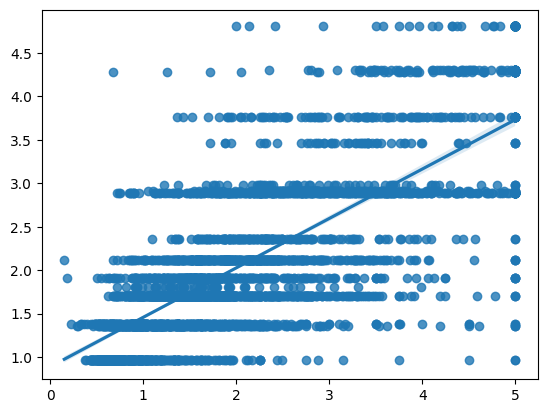

In [186]:
sns.regplot(x=y_test, y=y_pred_dt)

In [177]:
%%time
# Train the Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

CPU times: user 9.33 s, sys: 102 ms, total: 9.43 s
Wall time: 9.46 s


In [180]:
print("Decision Tree: ", np.corrcoef(y_test,y_pred_dt)[0,1])
print("Random Forest: ", np.corrcoef(y_test,y_pred_rf)[0,1])
print("Catboost: ", np.corrcoef(y_test,y_pred)[0,1])

Decision Tree: Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 0.8129385244114361
Random Forest:  0.8975174160828809
Catboost:  0.9250664605676434
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Axes: >

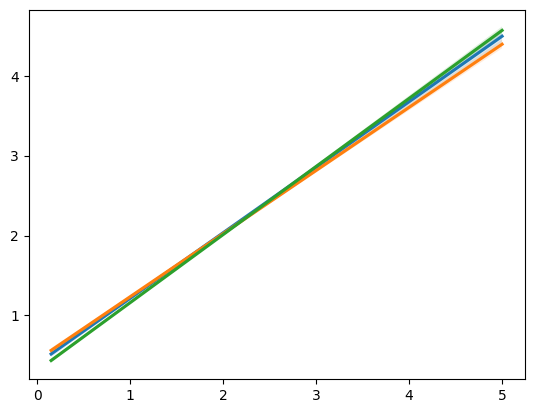

In [165]:
sns.regplot(x = y_test, y = y_pred_dt, scatter=False)
sns.regplot(x = y_test, y = y_pred_rf, scatter=False)
sns.regplot(x = y_test, y = y_pred, scatter=False)